# Decision tree and Random Forest prediction in adult dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load data

In [2]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
        'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']

In [3]:
data=pd.read_csv('desktop/adult.data',names=columns)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.shape

(32561, 15)

# Data Analysis

In [6]:
print(data.dtypes)
print(data.isnull().sum())

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64


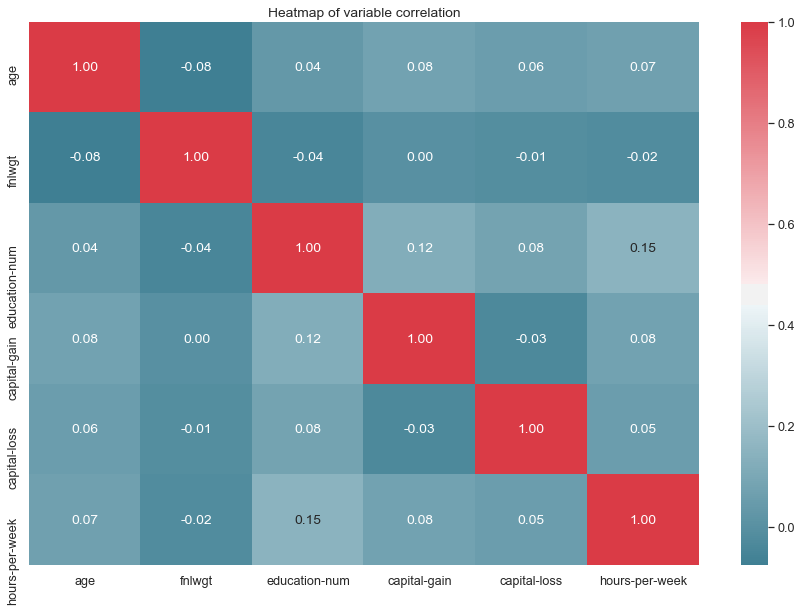

In [7]:
corr = data.corr()
sns.set(style="whitegrid",font_scale=1.15,rc={'figure.figsize':(15,10)},color_codes=True)
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,
            cmap=colormap,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True,fmt=".2f").set_title("Heatmap of variable correlation")
plt.savefig('desktop/heatmap_of_variable_correlation.png')
plt.show()

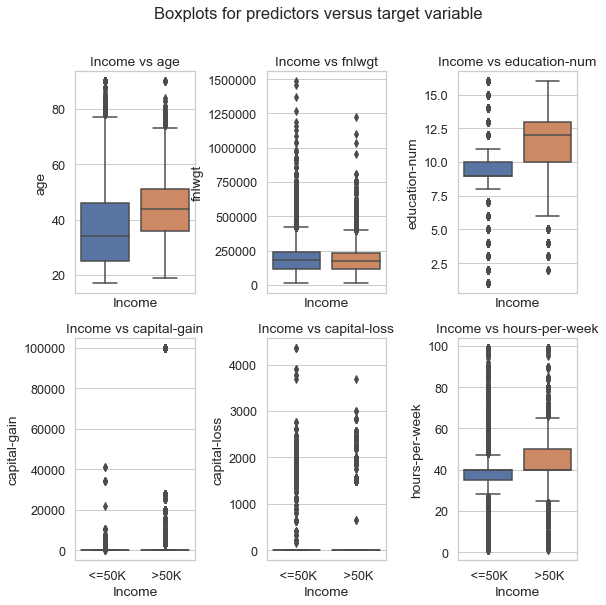

In [8]:
f, axes = plt.subplots(2, 3, figsize=(9, 9), sharex=True)
plt.subplots_adjust(hspace=0.2, wspace=0.6)
plt.suptitle("Boxplots for predictors versus target variable")
res,pred='Income','age'
dat=data.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[0,0]).set_title(str(res)+" vs "+str(pred))

res,pred='Income','fnlwgt'
dat=data.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[0,1]).set_title(str(res)+" vs "+str(pred))

res,pred='Income','education-num'
dat=data.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[0,2]).set_title(str(res)+" vs "+str(pred))

res,pred='Income','capital-gain'
dat=data.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[1,0]).set_title(str(res)+" vs "+str(pred))

res,pred='Income','capital-loss'
dat=data.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[1,1]).set_title(str(res)+" vs "+str(pred))

res,pred='Income','hours-per-week'
dat=data.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[1,2]).set_title(str(res)+" vs "+str(pred))
plt.savefig('desktop/Boxplots for predictors versus target variable.png')
plt.show()

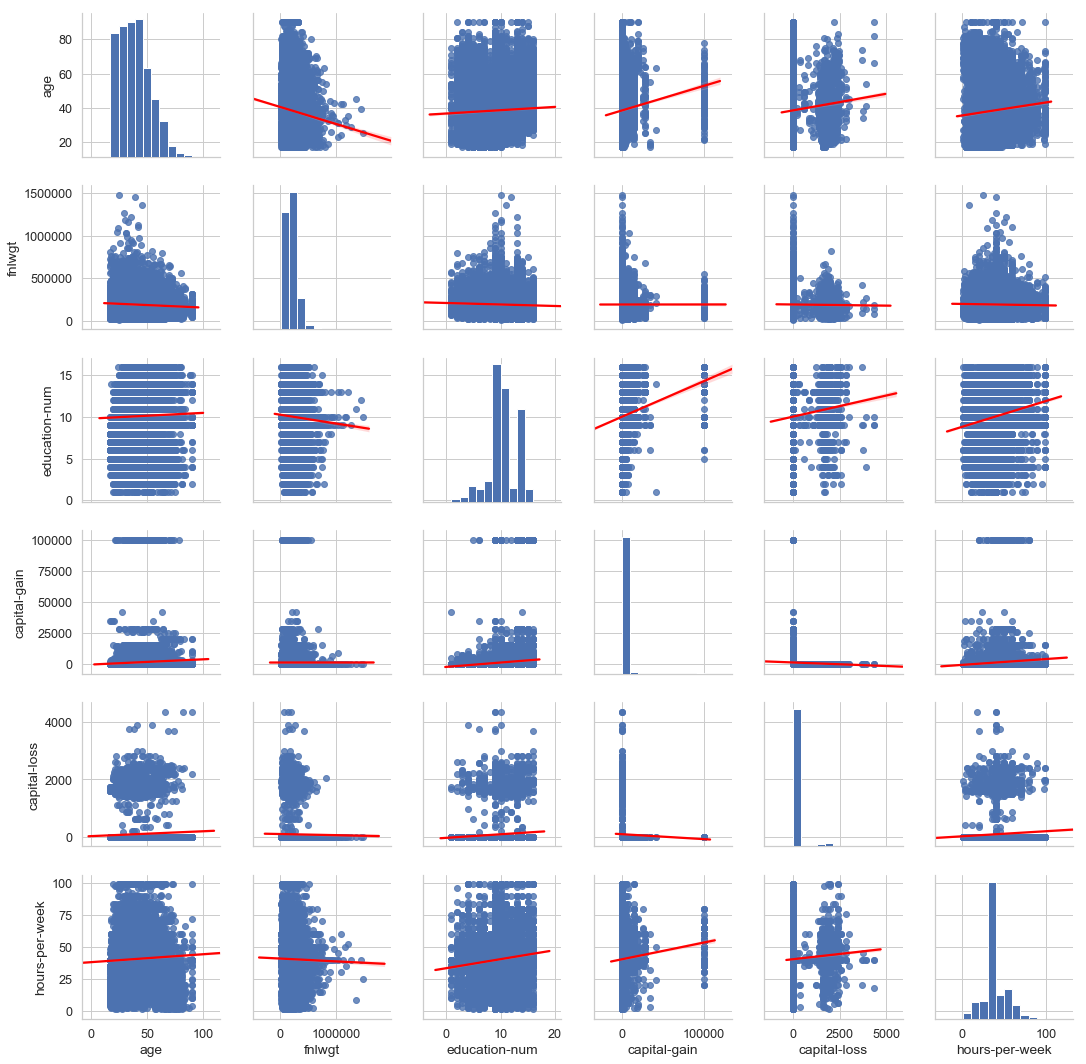

In [10]:
sns.pairplot(data.loc[:,['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']],
             kind="reg",plot_kws={'line_kws':{'color':'red'}})
plt.savefig('desktop/pairplot of adult.png')

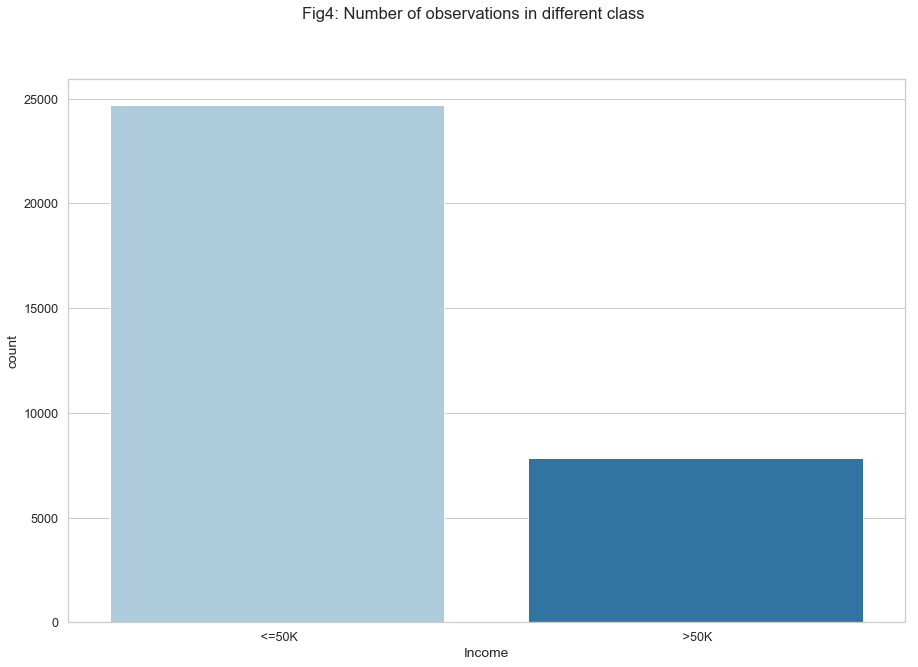

In [13]:
sns.countplot(x='Income',data=data,palette='Paired')
plt.suptitle("Fig4: Number of observations in different class")
plt.savefig('desktop/Number of observations in different class.png')
plt.show()

# Data preprocess

1. Remove all the records containing '?' (i.e., missing values). Also, remove the attribute "native-country".
2. create the new binary columns to replace the label
3. drop the Income columns
4. create dummies values to replace all the object attributes

In [14]:
def preprocess(data):
    data=data.drop('native-country',axis=1)
    data=data[(data.astype(str)!=' ?').all(axis=1)]
    data['Income_binary']=data.apply(lambda row: 1 if '>50K' in row['Income'] else 0, axis=1)
    data=data.drop('Income',axis=1)
    data=pd.get_dummies(data,columns=['workclass','education','marital-status','occupation','relationship',
                                     'race','sex'])
    return data

In [15]:
data=preprocess(data)

In [16]:
data.shape

(30718, 64)

In [17]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income_binary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


# Build Decision tree and Random forest model to train data

In [18]:
data.drop('Income_binary',axis=1).values.shape

(30718, 63)

In [19]:
data['Income_binary'].values.shape

(30718,)

In [20]:
# decision tree model 
X=data.drop('Income_binary',axis=1).values
y=data['Income_binary'].values
tree=DecisionTreeClassifier(max_depth=8)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# Random Forest model
X_ran=data.drop('Income_binary',axis=1).values
y_ran=data['Income_binary'].values
ensemble=RandomForestClassifier()
ensemble.fit(X_ran,y_ran)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Load test data and preprocess

In [24]:
test=pd.read_csv('desktop/data mining project/adult.test',names=columns)
test=test.drop([0],axis=0)

In [25]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [26]:
test.shape

(16281, 15)

In [27]:
test=preprocess(test)

In [28]:
test_label=test['Income_binary']
test_data=test.drop('Income_binary',axis=1)
print(test_label.shape)
print(test_data.shape)

(15315,)
(15315, 63)


# Prediction

In [29]:
# decision tree prediction
predict_dt=tree.predict(test_data.values)
predict_rf=ensemble.predict(test_data.values)

In [30]:
print(predict_dt.shape)
print(predict_rf.shape)

(15315,)
(15315,)


# Evaluate the accuracy of both model

In [31]:
Eval=pd.DataFrame(predict_dt,columns=['DecisionTree_label'])

In [32]:
rf=pd.DataFrame(predict_rf,columns=['RandomForest_label'])

In [33]:
Eval=pd.concat([Eval,rf],axis=1)

In [34]:
test_label=test_label.reset_index(drop=True)

In [35]:
Eval=pd.concat([test_label,Eval],axis=1)

In [36]:
Eval.head()

,Income_binary,DecisionTree_label,RandomForest_label
0,0,0,0
1,0,0,0
2,1,0,0
3,1,1,1
4,0,0,0


In [37]:
Eval['count_dt']=Eval['Income_binary']-Eval['DecisionTree_label']
Eval['count_rf']=Eval['Income_binary']-Eval['RandomForest_label']

The accuracy of decision tree is 0.850

The accuracy of random forest is 0.845

In [38]:
print(Eval['count_dt'].value_counts(normalize=True,dropna=False))
print(Eval['count_rf'].value_counts(normalize=True,dropna=False))

 0    0.850735
 1    0.114985
-1    0.034280
Name: count_dt, dtype: float64
 0    0.843421
 1    0.103036
-1    0.053542
Name: count_rf, dtype: float64


After evaluate the overall accuracy, We also should to output the classification report of each model

# Evaluating Metrics and Scoring

In [55]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_label.values, predict_dt)
print(confusion_matrix)
# Decision tree classification report
from sklearn.metrics import classification_report
print(classification_report(test_label.values,predict_dt,target_names=["0","1"]))

[[11018   525]
 [ 1761  2011]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     11543
           1       0.79      0.53      0.64      3772

   micro avg       0.85      0.85      0.85     15315
   macro avg       0.83      0.74      0.77     15315
weighted avg       0.85      0.85      0.84     15315



In [51]:
# Ranom forest classification report
print(classification_report(test_label.values,predict_rf,target_names=["0","1"]))

<function confusion_matrix at 0x1a1b2f3268>
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11543
           1       0.73      0.58      0.65      3772

   micro avg       0.84      0.84      0.84     15315
   macro avg       0.80      0.76      0.77     15315
weighted avg       0.84      0.84      0.84     15315

